### Mall Customer Clustering
#### Practise do K-mean algorithm for customer segmentation following Roshan Sharma in Kaggle.com

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)
import plotly.figure_factory as ff

In [2]:
mall = pd.read_csv('Mall_Customers.csv')
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
mall.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [4]:
mall.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [5]:
mall.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
x = mall.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']].values
x.shape

(200, 2)

C:\Users\Z-Service\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



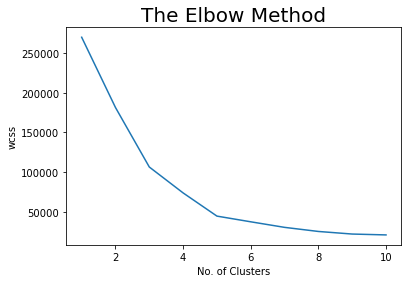

In [7]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize=20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

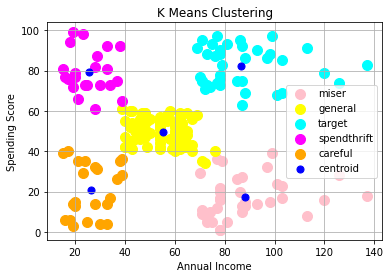

In [8]:
km = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means==0, 0], x[y_means==0, 1], s=100, c='pink', label='miser')
plt.scatter(x[y_means==1, 0], x[y_means==1, 1], s=100, c='yellow', label='general')
plt.scatter(x[y_means==2, 0], x[y_means==2, 1], s=100, c='cyan', label='target')
plt.scatter(x[y_means==3, 0], x[y_means==3, 1], s=100, c='magenta', label='spendthrift')
plt.scatter(x[y_means==4, 0], x[y_means==4, 1], s=100, c='orange', label='careful')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=50, c='blue', label='centroid')

plt.title('K Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

In [9]:
x = mall.iloc[:, [2, 4]].values
x

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

C:\Users\Z-Service\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



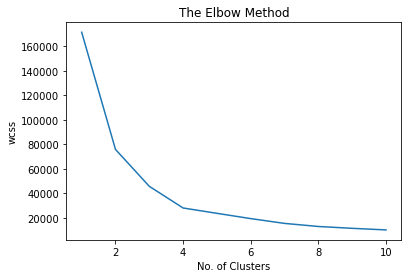

In [10]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

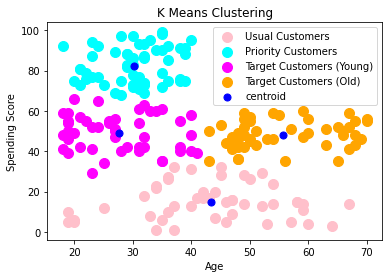

In [11]:
km = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means==0, 0], x[y_means==0, 1], s=100, c='pink', label='Usual Customers')
plt.scatter(x[y_means==1, 0], x[y_means==1, 1], s=100, c='cyan', label='Priority Customers')
plt.scatter(x[y_means==2, 0], x[y_means==2, 1], s=100, c='magenta', label='Target Customers (Young)')
plt.scatter(x[y_means==3, 0], x[y_means==3, 1], s=100, c='orange', label='Target Customers (Old)')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=50, c='blue', label='centroid')

plt.title('K Means Clustering')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [12]:
x = mall[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']].values
km = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
km.fit(x)
labels = km.labels_
centroids = km.cluster_centers_

In [13]:
mall['labels'] = labels
trace1 = go.Scatter3d(x=mall['Age'], 
                      y=mall['Spending Score (1-100)'], 
                      z=mall['Annual Income (k$)'], 
                      mode='markers',
                      marker=dict(
                          color=mall['labels'],
                          size=10,
                          line=dict(
                              color=mall['labels'],
                              width=12
                          ),
                      opacity=0.8
                      )
                     )
df = [trace1]
layout = go.Layout(title='Character vs Gender vs Alive or not',
                  margin=dict(
                      l=0,
                      r=0,
                      b=0,
                      t=0
                  ),
                   scene=dict(
                       xaxis = dict(title='Age'),
                       yaxis = dict(title='Spending Score'),
                       zaxis = dict(title='Annual Income')
                    )
                  )

fig = go.Figure(data=df, layout=layout)
py.iplot(fig)